## You’ve been sent the attached file (“mystery_machine.csv”) - tell us something interesting about the data.

Since no information was surplied bout the data, I will explore the data as much as possible 

###### Import libraries

In [24]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import scipy 

import sys
sys.path.append('C:\Anaconda\Lib\site-packages')
import seaborn as sns
sns.set_style("whitegrid")

###### Load dataset

In [2]:
data = pd.read_csv("mystery_machine.csv")

In [3]:
data.shape

(744554, 2)

In [23]:
data.head(3)

,id,interest_counts
0,1,947455_1
1,2,942463_1
2,3,941714_1


In [5]:
#xxx  = data['interest_counts'].str.join(sep='|').str.get_dummies(sep='|')

In [6]:
#xxx = data['interest_counts'].str.get_dummies('|')
#del xxx

In [7]:
#data.groupby('interest_counts')

In [8]:
#1. Split column 'interest_counts' to DataFrame
#2. Stack it
#3. Creat new series with reset_index and rename

new_data = data['interest_counts'].str.split('|',expand=True).stack().reset_index(drop=True, level=1).rename('interest_counts')

In [61]:
new_data.shape

(994359L,)

In [62]:
new_data.head()

0    947455_1
1    942463_1
2    941714_1
3    947533_1
4    947975_1
Name: interest_counts, dtype: object

In [63]:
### if NA in data
#new_data2 = pd.DataFrame([ x.split('|') for x in data['interest_counts'].tolist() ]) \
#         .stack() \
#         .reset_index(drop=True, level=1) \
#         .rename('interest_counts')

In [64]:
#new_data2.head()

In [13]:
final_table = (data.drop('interest_counts', axis=1)
             .join
             (
             data['interest_counts']
             .str
             .split('|', expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('interest_counts')           
             ))

In [65]:
final_table.head()

,id,interest_counts
0,1,947455_1
1,2,942463_1
2,3,941714_1
3,4,947533_1
4,5,947975_1


In [66]:
final_table.shape

(994359, 2)

###### Determine how many interest_counts a particular user belongs to

In [15]:
#data_grps = final_table.groupby('interest_counts').aggregate(np.sum)
data_grps = final_table.groupby('id').size()

In [67]:
data_grps = pd.DataFrame(data_grps)
data_grps.head(13)

,total
id,
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [17]:
#data_grps.values[2]='total'
#data_grps = data_grps.rename(columns={'id', 'id','', 'total'})
data_grps.columns=['total']
data_grps.shape

(744554, 1)

In [83]:
data_freq = data_grps['total'].value_counts()
data_freq.columns = ['Number', 'frequency']
#data_freq = data_freq[['frequency', 'Number']]
data_freq.head(3)
data_freq

1     608757
2      79728
3      31504
4      14803
5       3940
6       1858
7       1060
8        716
9        506
10       399
11       275
12       208
13       143
14       115
15       105
16        67
18        63
19        55
17        53
21        28
22        22
23        21
20        18
25        17
26        14
24        13
27        11
29        10
31         8
34         6
28         6
33         5
30         3
32         3
39         2
41         2
51         1
35         1
36         1
37         1
38         1
40         1
46         1
47         1
48         1
53         1
Name: total, dtype: int64

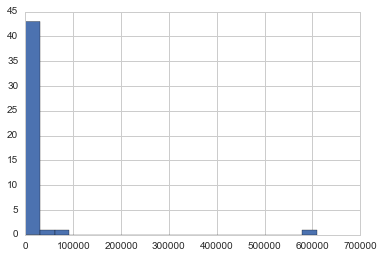

In [37]:
data_freq.hist(bins=20) 

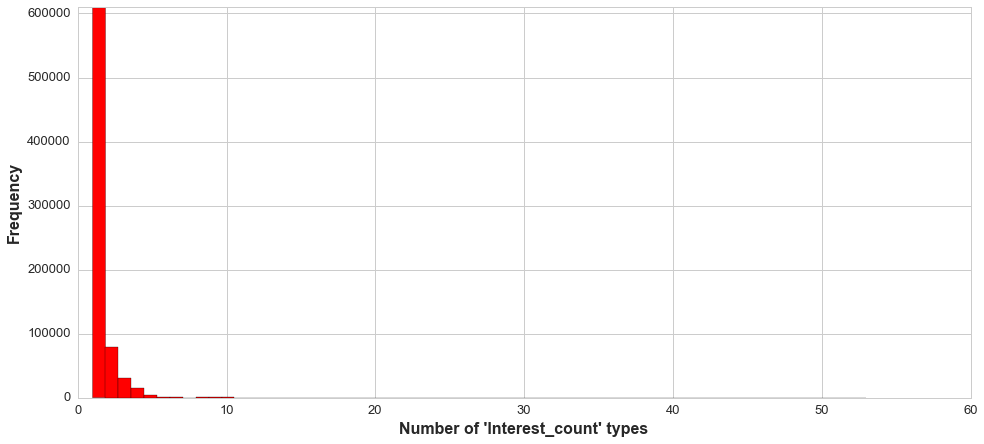

In [103]:
freq_plot = data_grps['total'].hist(bins=60, color='red', figsize=(16, 7))

#freq_plot.set_title("Frequency of \'interest_count\' types", fontsize=20, fontweight='bold')
freq_plot.set_xlabel("Number of \'Interest_count\' types", fontsize=16,fontweight='bold')
freq_plot.set_ylabel("Frequency", fontsize=16,fontweight='bold')

freq_plot.set_xlim(0, 60)
freq_plot.set_ylim(0, 610000)
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig("interest_count-frequency.png", dpi=600, bbox="tight")


In [50]:
len(data_grps['total'].unique())

46

###### The most frequent value/item

In [91]:
final_table['interest_counts'].value_counts().idxmax() 

'941714_1'

###### Number of the most frequent item

In [92]:
final_table['interest_counts'].value_counts().max() 

129582

###### The least frequent value/item

In [79]:
final_table['interest_counts'].value_counts().idxmin() # 1

'948047_3'

###### Number of the least frequent item

In [93]:
final_table['interest_counts'].value_counts().min() 

1

###### Percentage of users with only one interest_count

In [96]:
(float(608757)/744554)*100

81.76129602419704